## Classifying workers as making less than or greater than 50K

In [1]:
import pandas as pd
import numpy as np

In [2]:
# FUNCTION TO ENCODE THE STRING DATA
def getIntVal(A):
    nums = []
    dataf = pd.get_dummies(A,prefix='num')
    for c in dataf.itertuples():
        nums.append(np.argmax([x for x in c[1:]]))
    return nums

### Familiarising with the dataset and processing it for classfication

In [3]:
df = pd.read_csv('adult.data')

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,ltgt50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df['ltgt50k'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
df['label'] = df['ltgt50k'].apply(lambda x: 1 if x == " >50K" else 0)

In [7]:
df.isnull().count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education_num     32561
marital_status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital_gain      32561
capital_loss      32561
hours_per_week    32561
native_country    32561
ltgt50k           32561
label             32561
dtype: int64

In [8]:
df.isna().count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education_num     32561
marital_status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital_gain      32561
capital_loss      32561
hours_per_week    32561
native_country    32561
ltgt50k           32561
label             32561
dtype: int64

In [9]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
missing_val_indices = []
for i in df['workclass'].iteritems():
    if '?' in i[1]:
        missing_val_indices.append(i[0])

In [11]:
df['workclass_num'] = getIntVal(df['workclass'])

In [12]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,ltgt50k,label,workclass_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,7
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,6
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,4
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,4
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,4
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,4


In [13]:
df['workclass_num'].median()

4.0

In [14]:
for i in missing_val_indices:
    df['workclass'][i] = ' Private' # 4 corresponds to 'Private'

C:\Users\advai\AppData\Local\Temp/ipykernel_2836/3715233358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'][i] = ' Private' # 4 corresponds to 'Private'


In [15]:
df['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [16]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [17]:
df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [18]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [19]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [20]:
df = df[df.occupation != ' ?']

In [21]:
df['occupation'].value_counts().sum()

30718

In [22]:
df['relationship'].value_counts()

 Husband           12704
 Not-in-family      7865
 Own-child          4525
 Unmarried          3271
 Wife               1435
 Other-relative      918
Name: relationship, dtype: int64

In [23]:
df['race'].value_counts()

 White                 26301
 Black                  2909
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

In [24]:
df['sex'].value_counts()

 Male      20788
 Female     9930
Name: sex, dtype: int64

In [25]:
df['native_country'].value_counts()

 United-States                 27504
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [26]:
df = df[df.native_country != ' ?']

In [27]:
df['native_country'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [28]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,ltgt50k,label,workclass_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,7
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,6
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,4
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,4
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,4
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,4


In [29]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,ltgt50k,label,workclass_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,7
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,6
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,4
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,4
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,4
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,4


In [30]:
df['marital_status_num'] = getIntVal(df['marital_status'])

In [31]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,ltgt50k,label,workclass_num,marital_status_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,7,4
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,6,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,4,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,4,2
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,4,2
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,4,6
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,4,4


In [32]:
df['occupation_num'] = getIntVal(df['occupation'])

In [33]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,ltgt50k,label,workclass_num,marital_status_num,occupation_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,7,4,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,6,2,3
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,4,0,5
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,4,2,5
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,4,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,4,2,12
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,4,2,6
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,4,6,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,4,4,0


In [34]:
df['relationship_num'] = getIntVal(df['relationship'])

In [35]:
df['race_num'] = getIntVal(df['race'])

In [36]:
df['sex_num'] = getIntVal(df['sex'])

In [37]:
df['native_country_num'] = getIntVal(df['native_country'])

In [38]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,ltgt50k,label,workclass_num,marital_status_num,occupation_num,relationship_num,race_num,sex_num,native_country_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,0,7,4,0,1,4,1,38
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,0,6,2,3,0,4,1,38
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,0,4,0,5,1,4,1,38
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,0,4,2,5,0,2,1,38
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,0,4,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,United-States,<=50K,0,4,2,12,5,4,0,38
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,United-States,>50K,1,4,2,6,0,4,1,38
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,United-States,<=50K,0,4,6,0,4,4,0,38
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,United-States,<=50K,0,4,4,0,3,4,1,38


#### Conducting Chi Square test to find best features

In [39]:
df2 = df.filter(['age','fnlwgt','education_num','workclass_num','marital_status_num','occupation_num','relationship_num',
                 'race_num','sex_num','native_country_num','label'],axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

resultant = pd.DataFrame(data=[(0 for i in range(len(df2.columns))) for i in range(len(df2.columns))], 
                         columns=list(df2.columns))
resultant.set_index(pd.Index(list(df2.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df2.columns):
    for j in list(df2.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df2[i]).reshape(-1, 1), np.array(df2[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                              age        fnlwgt  education_num  workclass_num  \
age                  0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
fnlwgt               0.000000e+00  0.000000e+00   0.000000e+00   0.000000e+00   
education_num       6.981667e-183  1.000000e+00   0.000000e+00  2.862599e-144   
workclass_num        8.034272e-01  1.000000e+00   8.977910e-12   0.000000e+00   
marital_status_num   0.000000e+00  1.131480e-01   3.333760e-52   3.936323e-47   
occupation_num       4.661400e-43  0.000000e+00   0.000000e+00  1.695872e-132   
relationship_num     0.000000e+00  0.000000e+00  4.103739e-241  4.192874e-216   
race_num             1.000000e+00  1.000000e+00   8.559791e-01   1.978748e-07   
sex_num              2.300356e-09  1.000000e+00   4.315683e-11   1.164551e-41   
native_country_num   2.214062e-03  2.001973e-59   0.000000e+00   3.331863e-10   
label                0.000000e+00  1.000000e+00   0.000000e+00  3.222853e-127   

                    marital

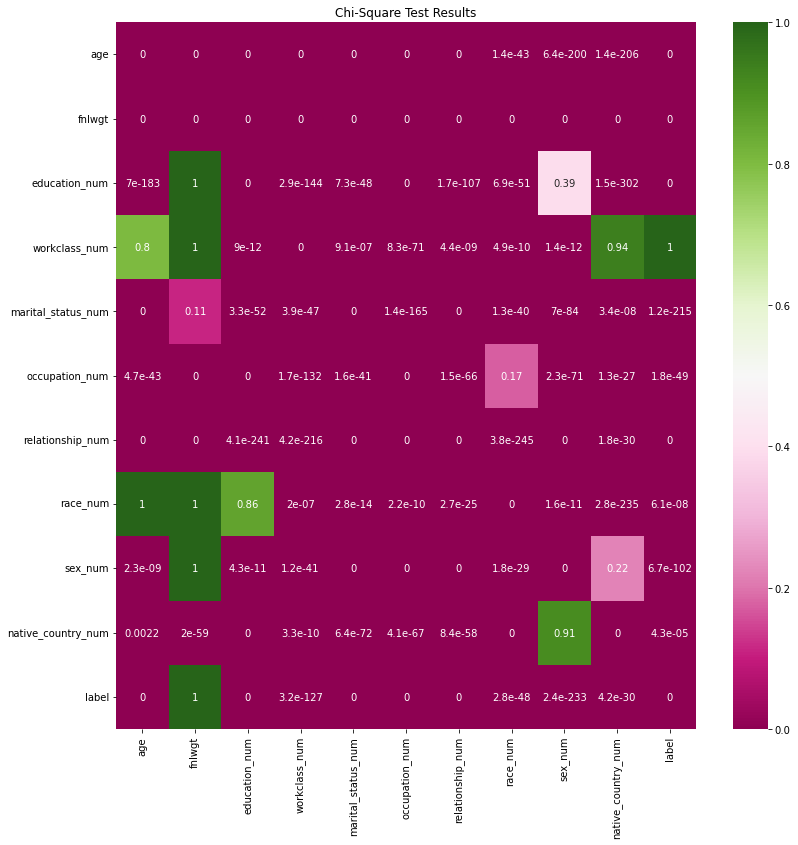

In [40]:
fig = plt.figure(figsize=(13,13))
sns.heatmap(resultant, annot=True, cmap='PiYG')
plt.title('Chi-Square Test Results')
plt.show()

In [41]:
z = resultant['label'].copy()
z.sort_values(inplace=True)
for a in z:
    if a >= 0.05:
        print(f"{a} is good")
    else:
        print(f"{a} isn't nice enough")

0.0 isn't nice enough
0.0 isn't nice enough
0.0 isn't nice enough
0.0 isn't nice enough
0.0 isn't nice enough
1.2125041919748514e-215 isn't nice enough
6.670437761426141e-102 isn't nice enough
1.8332510114798504e-49 isn't nice enough
6.094538130080783e-08 isn't nice enough
4.309052600793475e-05 isn't nice enough
0.9986077835923381 is good


#### I see that only workclass_num passes the chi square test, its p-value is above 0.05

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
features = ['workclass_num']

###### Scaling the values

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.loc[:,features]
y = df['label']

X_std = scaler.fit_transform(X)

##### Train-Test split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3,random_state=42)

In [80]:
from sklearn.svm import SVC

##### Training and fitting the Support Vector Classifier

In [81]:
svc = SVC(kernel='rbf').fit(X_train,y_train)

###### Making predictions on Test data

In [82]:
y_pred = svc.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Printing the Confusion Matrix for the model

C:\Users\advai\AppData\Local\Temp/ipykernel_2836/1149652853.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


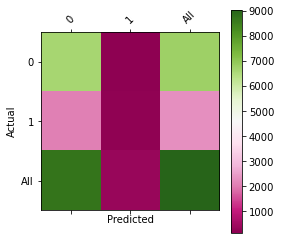

In [103]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(cm,cmap='PiYG')

#### Printing the Classfication Report

In [104]:
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      6767
           1       0.56      0.08      0.14      2282

    accuracy                           0.75      9049
   macro avg       0.66      0.53      0.50      9049
weighted avg       0.71      0.75      0.68      9049



#### Printing the Accuracy Report

In [105]:
print(accuracy_score(y_test,y_pred))

0.7522378163332964
